In cooperation with Shengshi Yuan

In [2]:
# lifetime of tempertures 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
from datetime import datetime
indy=pd.read_csv("indy.csv")

date=pd.to_datetime(indy["DATE"])
indy=indy.drop(["STATION"],axis=1)
indy=indy.drop(["DATE"],axis=1)
indy.index=date
#per = indy.date.dt.to_period("Y")
#s=set(indy.index.year)
#s=list(s)
#for elem in s:
    #print(int(elem))

In [111]:
def determine_leap(n):
    if n%4==0:
        if n%100==0:
            if n%400==0:
                return True
            else: return False
        else:return True
    else:return False

In [121]:
def read_data(path,name):
    name=pd.read_csv(path)
    date=pd.to_datetime(name["DATE"])
    name=name.drop(["STATION"],axis=1)
    name=name.drop(["DATE"],axis=1)
    name.index=date
    return name               

In [112]:
col=pd.date_range(start='9/21/1974',end='9/20/2017',freq="D")
years=np.arange(1975,2018)
print(len(col))

15706


In [113]:
def reindex(years):
    a=np.arange(1,367)
    b1=np.arange(1,60)
    b2=np.arange(61,367)
    b=np.append(b1,b2)
    day=np.array([])
    for elem in years:
        if determine_leap(elem)==True:
            day=np.append(day,a)
        else:
            day=np.append(day,b)
    return day
        

In [151]:
day=reindex(years)

In [160]:
new_df=pd.DataFrame(day,index=col,columns=['Day'])
new_df.index.name="DATE"

In [150]:
indy=read_data("indy.csv",indy)

In [169]:
pit=read_data("pit.csv","pit")


In [146]:
miami=read_data("Miami.csv","miami")
miami=miami.drop(['NAME'],axis=1)

In [147]:
chicago=read_data("chicago.csv","chicago")

In [148]:
wash=read_data("wash.csv","wash")

In [144]:
frames=[indy,pit,miami,wash,chicago]
result=pd.concat(frames)

In [164]:
result1=pd.merge(result,new_df,on="DATE")

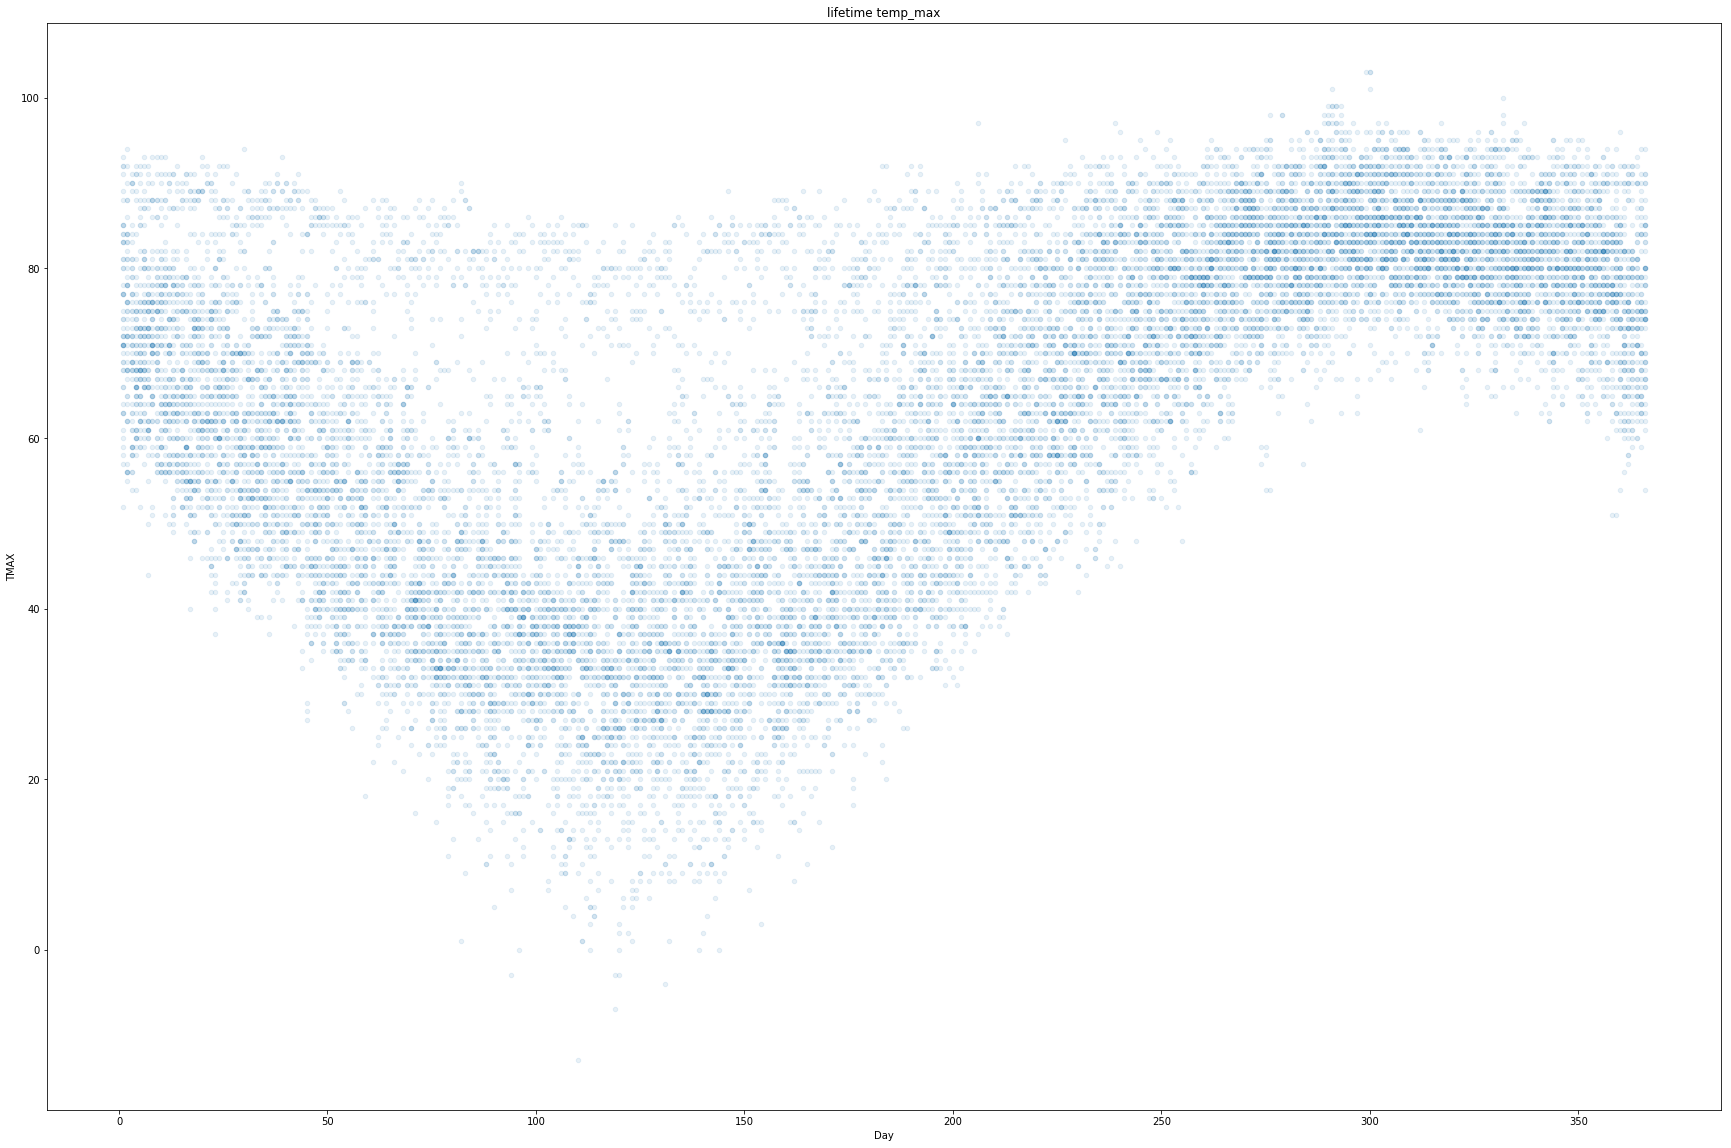

In [172]:
result1.plot(kind="scatter",x="Day",y="TMAX",title="lifetime temp_max",figsize=(30,20),alpha=0.1)




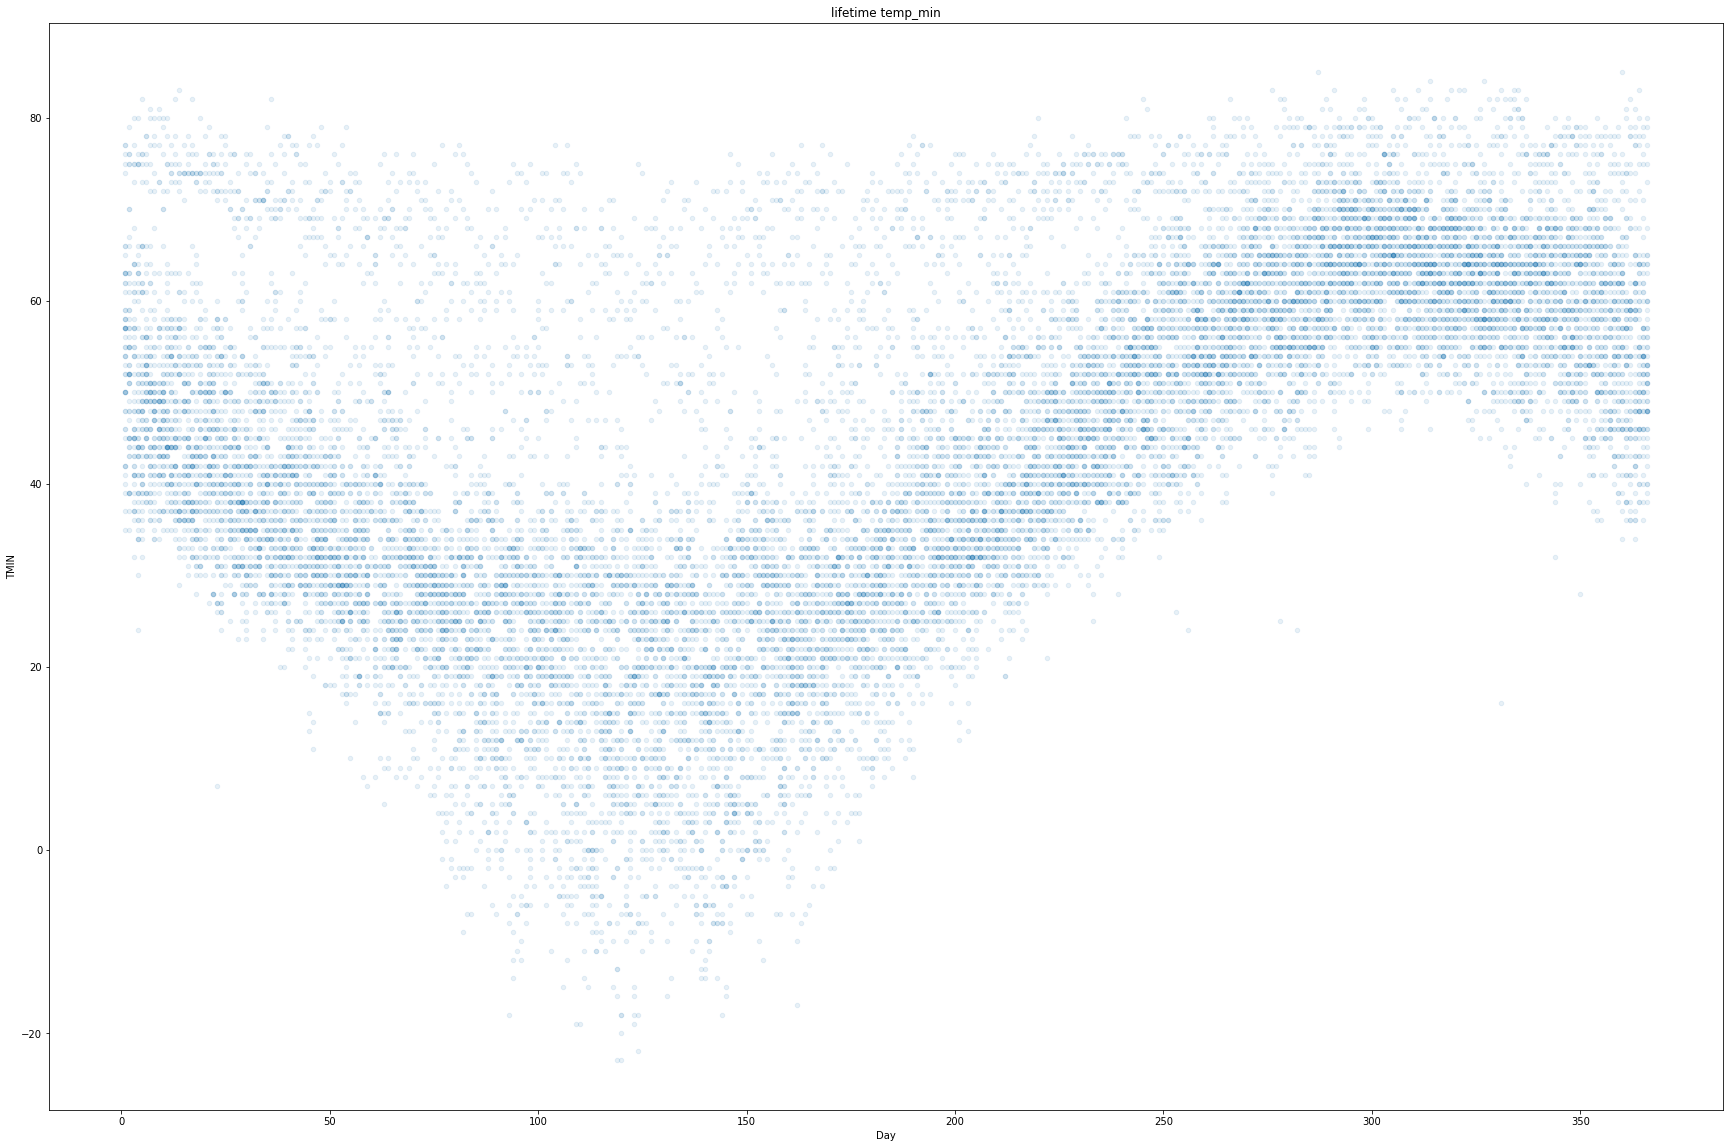

In [173]:
result1.plot(kind="scatter",x="Day",y="TMIN",title="lifetime temp_min",figsize=(30,20),alpha=0.1)

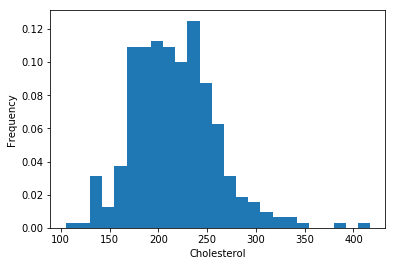

the midpoint of the bin with the highest frequency is:  236.04000000000002


In [15]:
# 3D histogram
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

lipids=pd.read_csv("lipids.csv",header=4)
lipids=lipids[lipids['diseased']==1]
counts, bins, _ = plt.hist(lipids['chol'], weights=np.zeros_like(lipids['chol']) + 1.0 / lipids['chol'].size, bins=25)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()
print("the midpoint of the bin with the highest frequency is: ",bins[[counts.argmax(), counts.argmax()+1]].mean())

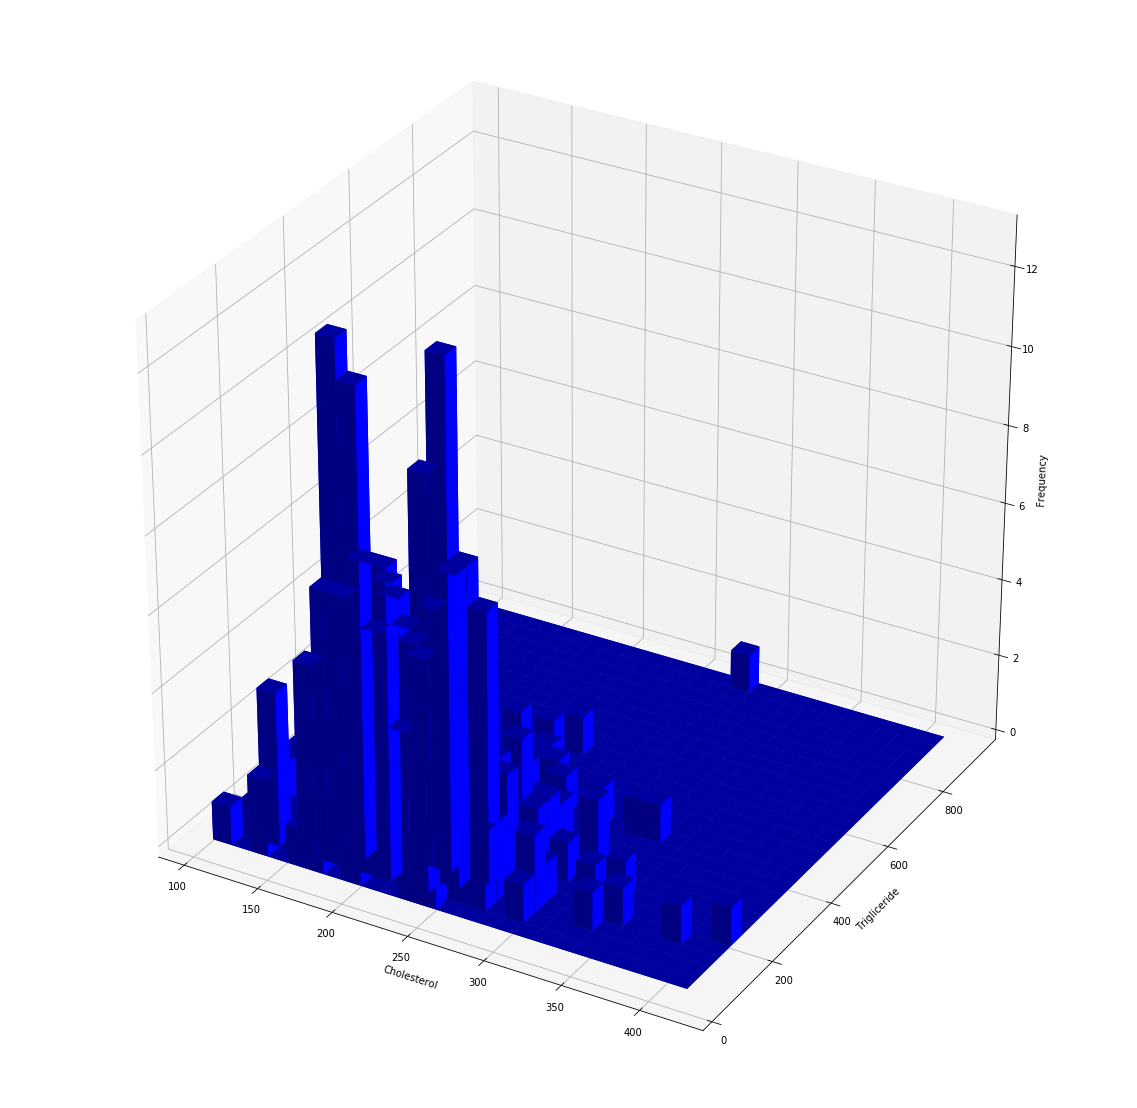

In [18]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(lipids['chol'], lipids['trig'], bins=25)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)
dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average',alpha=1)
plt.xlabel("Cholesterol")
plt.ylabel("Trigliceride")
ax.set_zlabel('Frequency')
plt.show()

In [19]:
#Visualize recessions
#Comparing segments of time series
payems = pd.read_csv("payems.csv")
print(payems.head())

tempStr = ""
tempYr = 0
tempDM = ""
newDates = []
for i in range(len(payems)):
    tempStr = payems.iloc[i]["DATE"]
    tempYr = int(tempStr[-2:])
    tempDM = tempStr[:-2]
    if tempYr >= 29:
        tempYr = 1900 + tempYr
    
    else:
        tempYr = 2000 + tempYr
    newDates.append(tempDM + str(tempYr))
payems["DATE"] = newDates

payems["DATE"] = pd.to_datetime(payems["DATE"])
#payems = payems.drop("DATE", axis = 1)
#payems.index = date3
print(payems.head())

     DATE  PAYEMS
0  7/1/29   31294
1  7/1/30   29577
2  7/1/31   27027
3  7/1/32   24216
4  7/1/33   24132
        DATE  PAYEMS
0 1929-07-01   31294
1 1930-07-01   29577
2 1931-07-01   27027
3 1932-07-01   24216
4 1933-07-01   24132


In [20]:
matrix = np.array([[1929, 8], [1937, 5], [1945, 2], [1948, 11], [1953, 7], [1957, 8], [1960, 4], 
                   [1969, 12], [1973, 11], [1980, 1], [1981, 7], [1990, 7], [2001, 3], [2007, 12]])
start = np.array([[1929, 8], [1937, 5], [1945, 2], [1948, 11], [1953, 7], [1957, 8], [1960, 4], 
                   [1969, 12], [1973, 11], [1980, 1], [1981, 7], [1990, 7], [2001, 3], [2007, 12]])
end = np.array([[1929, 8], [1937, 5], [1945, 2], [1948, 11], [1953, 7], [1957, 8], [1960, 4], 
                   [1969, 12], [1973, 11], [1980, 1], [1981, 7], [1990, 7], [2001, 3], [2007, 12]])

peek_dates = []

for m in range(14):
    peek_dates.append(datetime(matrix[m,0], matrix[m,1], 1))
    
    
#print(peek_dates)

for i in range(14):
    start[i, 0] = matrix[i, 0]-1
    end[i, 0] = matrix[i, 0]+10
    end[i, 1] = matrix[i, 1]+5
    if end[i,1]>12:
        end[i,0] = end[i, 0]+1
        end[i,1] = end[i,1] -12
        
masks = []
masks.append((payems['DATE'] >= '1928-08-01') & (payems['DATE'] <= '1940-01-01'))
masks.append((payems['DATE'] >= '1936-05-01') & (payems['DATE'] <= '1947-10-01'))
masks.append((payems['DATE'] >= '1944-02-01') & (payems['DATE'] <= '1955-07-01'))
masks.append((payems['DATE'] >= '1947-11-01') & (payems['DATE'] <= '1959-04-01'))
masks.append((payems['DATE'] >= '1952-07-01') & (payems['DATE'] <= '1963-12-01'))
masks.append((payems['DATE'] >= '1956-08-01') & (payems['DATE'] <= '1968-01-01'))
masks.append((payems['DATE'] >= '1959-04-01') & (payems['DATE'] <= '1970-09-01'))
masks.append((payems['DATE'] >= '1968-12-01') & (payems['DATE'] <= '1980-05-01'))
masks.append((payems['DATE'] >= '1972-11-01') & (payems['DATE'] <= '1984-04-01'))
masks.append((payems['DATE'] >= '1979-01-01') & (payems['DATE'] <= '1990-06-01'))
masks.append((payems['DATE'] >= '1980-07-01') & (payems['DATE'] <= '1991-12-01'))
masks.append((payems['DATE'] >= '1989-07-01') & (payems['DATE'] <= '2000-12-01'))
masks.append((payems['DATE'] >= '2000-03-01') & (payems['DATE'] <= '2011-08-01'))
masks.append((payems['DATE'] >= '2006-12-01') & (payems['DATE'] <= '2018-05-01'))

recess = []
for ll in range(14):
    recess.append(payems[masks[ll]])

    
#the first two recessions contain missing data, need to be coped with separately.
norm = 0.0
for pp in range(2, 14):
    norm = float(recess[pp][recess[pp]["DATE"] == peek_dates[pp]]["PAYEMS"])
    values = recess[pp]["PAYEMS"] / norm
    recess[pp]["PAYEMS"] = values

print(recess[0])
recess[0]["PAYEMS"] = recess[0]["PAYEMS"]/31294.0
print(recess[1])
recess[1]["PAYEMS"] = recess[1]["PAYEMS"]/30705.0

/Users/Zeshun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


         DATE  PAYEMS
0  1929-07-01   31294
1  1930-07-01   29577
2  1931-07-01   27027
3  1932-07-01   24216
4  1933-07-01   24132
5  1934-07-01   26084
6  1935-07-01   27061
7  1936-07-01   28963
8  1937-07-01   30705
9  1938-07-01   29064
10 1939-01-01   29923
11 1939-02-01   30101
12 1939-03-01   30280
13 1939-04-01   30094
14 1939-05-01   30300
15 1939-06-01   30502
16 1939-07-01   30419
17 1939-08-01   30663
18 1939-09-01   31032
19 1939-10-01   31408
20 1939-11-01   31469
21 1939-12-01   31539
22 1940-01-01   31603
          DATE  PAYEMS
7   1936-07-01   28963
8   1937-07-01   30705
9   1938-07-01   29064
10  1939-01-01   29923
11  1939-02-01   30101
12  1939-03-01   30280
13  1939-04-01   30094
14  1939-05-01   30300
15  1939-06-01   30502
16  1939-07-01   30419
17  1939-08-01   30663
18  1939-09-01   31032
19  1939-10-01   31408
20  1939-11-01   31469
21  1939-12-01   31539
22  1940-01-01   31603
23  1940-02-01   31715
24  1940-03-01   31826
25  1940-04-01   31700
26  1940-05-

/Users/Zeshun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Zeshun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


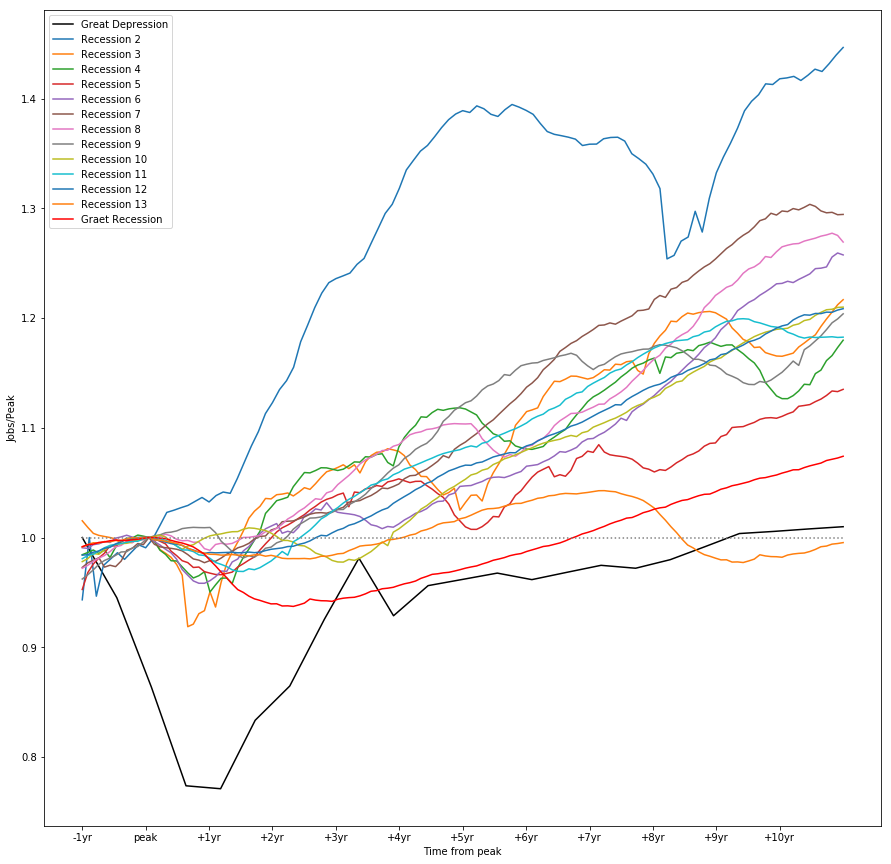

In [21]:
plt.figure(figsize = [15, 15])

plt.plot(np.linspace(0,12, len(recess[0]["PAYEMS"])), recess[0]["PAYEMS"], "k", label = "Great Depression")
plt.plot(np.linspace(0,12, len(recess[1]["PAYEMS"])), recess[1]["PAYEMS"], label = "Recession 2")
plt.plot(np.linspace(0,12, len(recess[2]["PAYEMS"])), recess[2]["PAYEMS"], label = "Recession 3")
plt.plot(np.linspace(0,12, len(recess[3]["PAYEMS"])), recess[3]["PAYEMS"], label = "Recession 4")
plt.plot(np.linspace(0,12, len(recess[4]["PAYEMS"])), recess[4]["PAYEMS"], label = "Recession 5")
plt.plot(np.linspace(0,12, len(recess[5]["PAYEMS"])), recess[5]["PAYEMS"], label = "Recession 6")
plt.plot(np.linspace(0,12, len(recess[6]["PAYEMS"])), recess[6]["PAYEMS"], label = "Recession 7")
plt.plot(np.linspace(0,12, len(recess[7]["PAYEMS"])), recess[7]["PAYEMS"], label = "Recession 8")
plt.plot(np.linspace(0,12, len(recess[8]["PAYEMS"])), recess[8]["PAYEMS"], label = "Recession 9")
plt.plot(np.linspace(0,12, len(recess[9]["PAYEMS"])), recess[9]["PAYEMS"], label = "Recession 10")
plt.plot(np.linspace(0,12, len(recess[10]["PAYEMS"])), recess[10]["PAYEMS"], label = "Recession 11")
plt.plot(np.linspace(0,12, len(recess[11]["PAYEMS"])), recess[11]["PAYEMS"], label = "Recession 12")
plt.plot(np.linspace(0,12, len(recess[12]["PAYEMS"])), recess[12]["PAYEMS"], label = "Recession 13")
plt.plot(np.linspace(0,12, len(recess[13]["PAYEMS"])), recess[13]["PAYEMS"], "r", label = "Graet Recession")

plt.plot(np.linspace(0,12,10), [1,1,1,1,1,1,1,1,1,1], color = "grey", linestyle = ":")

plt.legend()
#for jj in range(14):
 #   plt.plot(np.linspace(0,12, len(recess[jj]["PAYEMS"])), recess[jj]["PAYEMS"])

plt.ylabel("Jobs/Peak")
plt.xlabel("Time from peak")
plt.xticks(np.arange(0,12), ['-1yr', 'peak', '+1yr', '+2yr',
                            '+3yr', '+4yr', '+5yr', '+6yr', '+7yr', '+8yr', '+9yr', '+10yr'])
plt.show()

#plt.plot(recess[0]["PAYEMS"])

In [22]:
print("The great depression is indeed the worst recession.")

The great depression is indeed the worst recession.
